In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

Read data

In [46]:
sales_data=pd.read_csv("Train.csv")
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


count unique values

In [47]:
display (sales_data.apply(lambda x: len(x.unique())))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [48]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Store the Categorical columns in a list

In [49]:
cat_col = []
for x in sales_data.dtypes.index:
    if sales_data.dtypes[x] == 'object':
        cat_col.append(x)
display (cat_col)


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [50]:
display (sales_data['Item_Identifier'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [51]:
miss_bool = sales_data['Item_Weight'].isnull()
display (miss_bool)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

Find the mean for the column – Item Weight group by Item Identifier 

In [52]:
item_weight_mean = sales_data.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


Fill the missing values (Item Weight) with mean, the mean calculated by group by Item identifier  

In [53]:
for i,item in enumerate(sales_data['Item_Identifier']):
    if(miss_bool[i]):
        if item in item_weight_mean.index:
            sales_data['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            sales_data['Item_Weight'][i]=np.mean(sales_data['Item_Weight'])

C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_36952\1228724362.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sales_data['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykern

Fill empty values with mode for Output size

In [54]:
outlet_size_mode = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))


In [55]:
miss_bool=sales_data['Outlet_Size'].isnull()
sales_data.loc[miss_bool,'Outlet_Size']=sales_data.loc[miss_bool,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])

In [56]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Check if Item viibility coumn has zero value

In [57]:
sum(sales_data['Item_Visibility']==0)

526

Replace zeroes with mean

In [58]:
sales_data.loc[:, 'Item_Visibility'].replace([0], [sales_data['Item_Visibility'].mean()], inplace=True)

C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_36952\1247340048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data.loc[:, 'Item_Visibility'].replace([0], [sales_data['Item_Visibility'].mean()], inplace=True)


Consolidate similar Column Values 

In [59]:
sales_data['Item_Fat_Content'] = sales_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = sales_data['Item_Fat_Content'].value_counts()
result

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [60]:
sales_data['New_Item_Type'] = sales_data['Item_Identifier'].apply(lambda x: x[:2])
sales_data['New_Item_Type'] = sales_data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (sales_data['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [61]:
result = sales_data.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
result

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [62]:
sales_data['Outlet_Years'] = 2024 - sales_data['Outlet_Establishment_Year']

Exploratory Data Analysis

C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_36952\1862686626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Weight'])


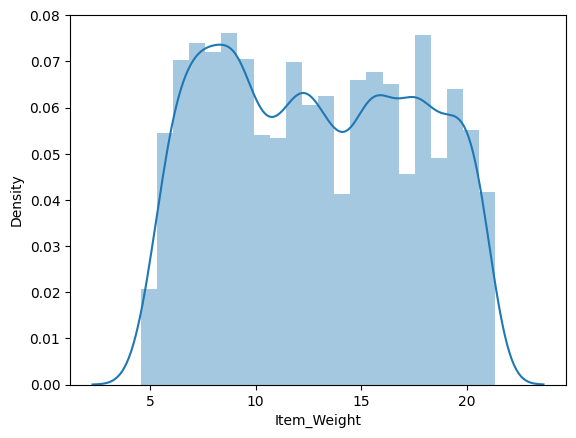

In [63]:
sns.distplot(sales_data['Item_Weight'])
plt.show()

C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_36952\2965269780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Visibility'])


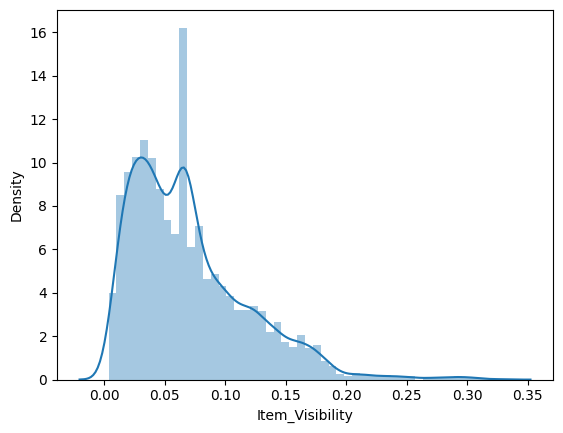

In [65]:
sns.distplot(sales_data['Item_Visibility'])
plt.show()

C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_36952\2467503902.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_MRP'])


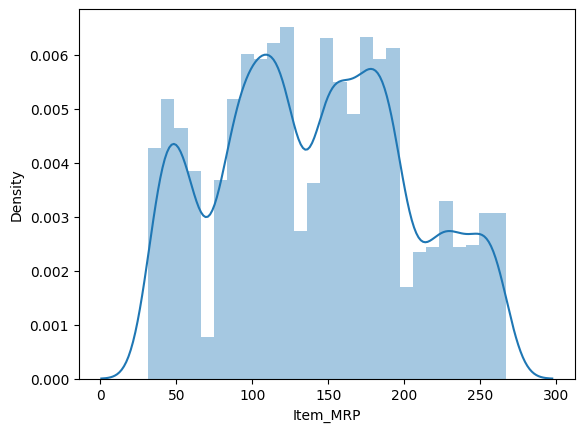

In [66]:
sns.distplot(sales_data['Item_MRP'])
plt.show()

C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_36952\4158711042.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Outlet_Sales'])


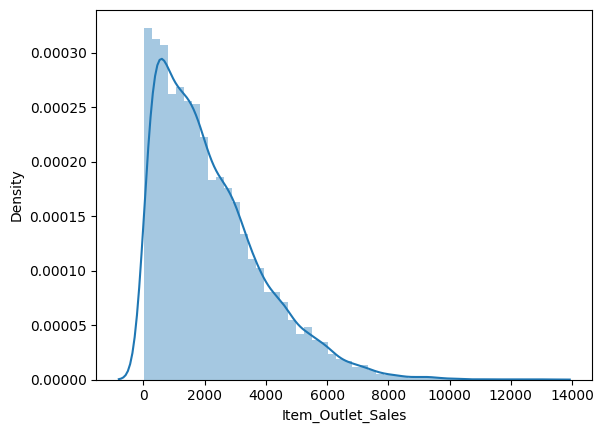

In [67]:
sns.distplot(sales_data['Item_Outlet_Sales'])
plt.show()


In [68]:
sales_data['Item_Outlet_Sales'] = np.log(1+sales_data['Item_Outlet_Sales'])
display (sales_data['Item_Outlet_Sales'])

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_36952\3192110120.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Outlet_Sales'])


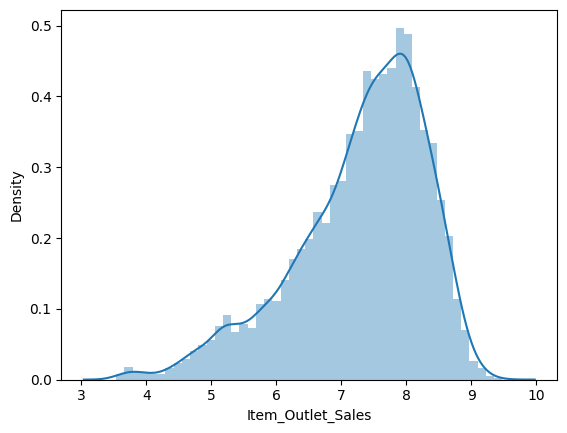

In [69]:
sns.distplot(sales_data['Item_Outlet_Sales'])
plt.show()

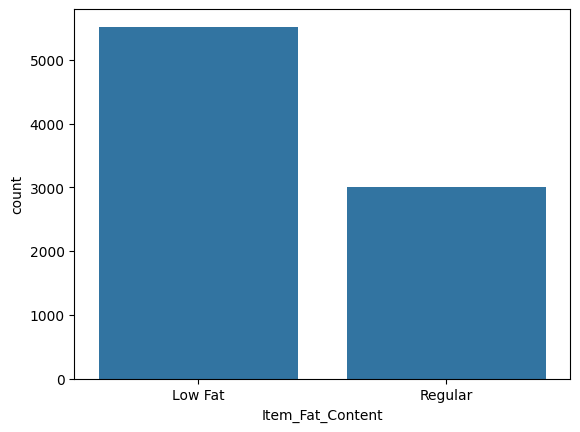

In [70]:
sns.countplot(x = sales_data["Item_Fat_Content"])
plt.show()

C:\Users\Kaustubha Ram\AppData\Local\Temp\ipykernel_36952\1541144627.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(labels=l, rotation=90)


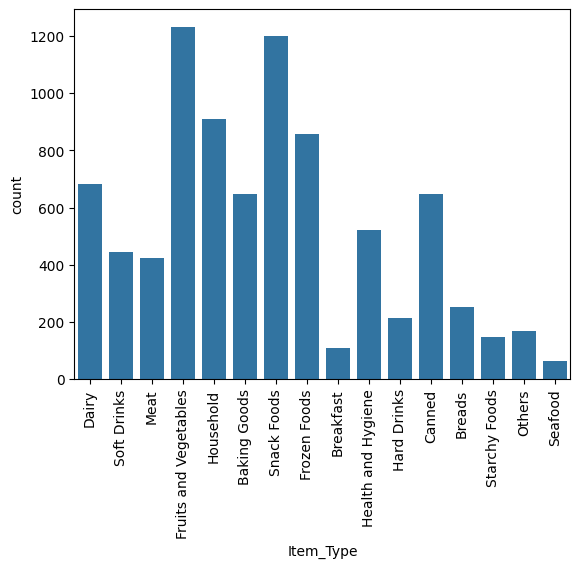

In [71]:
l = list(sales_data['Item_Type'].unique()) 
chart = sns.countplot(x =sales_data["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()

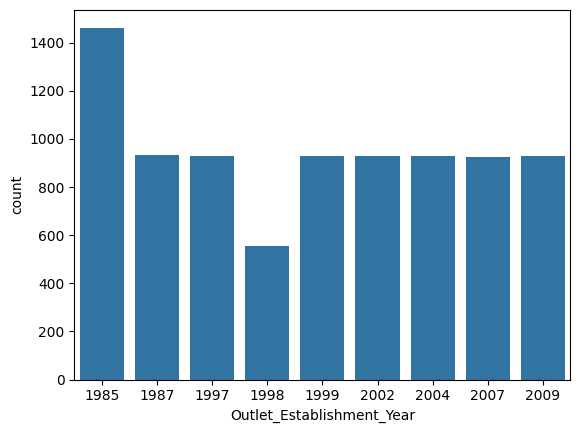

In [72]:
sns.countplot(x= sales_data['Outlet_Establishment_Year'])
plt.show()


Correlation Matrix

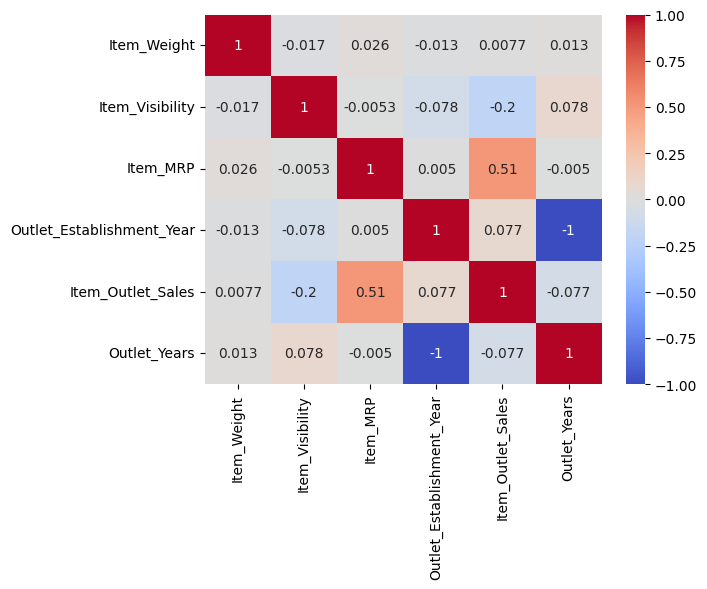

In [73]:
co= sales_data.iloc[:,[1,3,5,7,11,13]]
corr = co.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


Label Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sales_data['Outlet'] = le.fit_transform(sales_data['Outlet_Identifier'])
display (sales_data['Outlet'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    sales_data[col] = le.fit_transform(sales_data[col])
sales_data.head() 


0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,25,9
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,15,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,25,9
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,26,0
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,37,1


One Hot Encoding

In [ ]:
sales_data = pd.get_dummies(sales_data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],dtype = int )
sales_data.head()

In [75]:
x = sales_data.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
display(x.head())
y = sales_data['Item_Outlet_Sales']
display (y.head())


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,9.30,0,0.016047,4,249.8092,1,0,1,1,25,9
1,5.92,1,0.019278,14,48.2692,1,2,2,0,15,3
2,17.50,0,0.016760,10,141.6180,1,0,1,1,25,9
3,19.20,1,0.066132,6,182.0950,2,2,0,1,26,0
4,8.93,0,0.066132,9,53.8614,0,2,1,2,37,1


0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

Split train and test data

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
%pip install lightgbm
from lightgbm import LGBMRegressor
%pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [115]:
model1=LinearRegression()
model2=RandomForestRegressor()
model3=Lasso()
model4=DecisionTreeRegressor()
model5=ExtraTreesRegressor()
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]  
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

model6=RandomizedSearchCV(estimator = model2, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
model7=LGBMRegressor()
model8=XGBRegressor()
model9= Ridge()

In [120]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)
model6.fit(x_train,y_train)
model7.fit(x_train,y_train)
model8.fit(x_train,y_train)
model9.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\L

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 11
[LightGBM] [Info] Start training from score 7.295854


Ridge()

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Prediction

In [126]:
lin_train_pred=model1.predict(x_train)
lin_test_pred=model1.predict(x_test)
ran_train_pred=model2.predict(x_train)
ran_test_pred=model2.predict(x_test)
las_train_pred=model3.predict(x_train)
las_test_pred=model3.predict(x_test)
dt_train_pred=model4.predict(x_train)
dt_test_pred=model4.predict(x_test)
et_train_pred=model5.predict(x_train)
et_test_pred=model5.predict(x_test)
rscv_train_pred=model6.predict(x_train)
rscv_test_pred=model6.predict(x_test)
lgbm_train_pred=model7.predict(x_train)
lgbm_test_pred=model7.predict(x_test)
xgb_train_pred=model8.predict(x_train)
xgb_test_pred=model8.predict(x_test)
rid_train_pred=model9.predict(x_train)
rid_test_pred=model9.predict(x_test)

Linear Regression

R2 score of train data:  0.584517199946037
R2 score of test data:  0.5693901700319891
Average R2 Score  0.4339897036947991


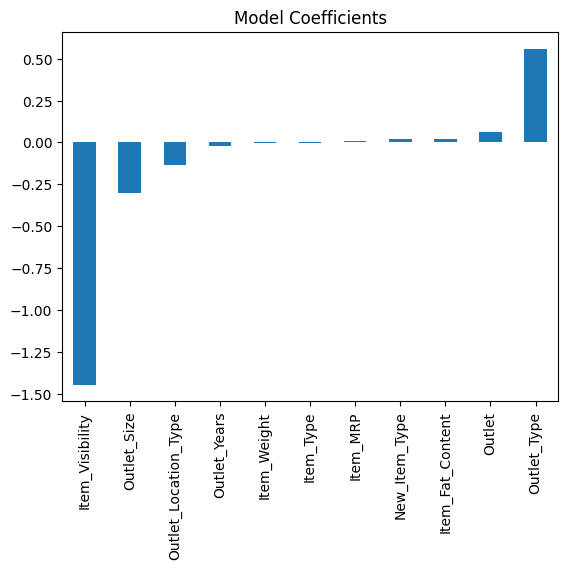

In [149]:
print("R2 score of train data: ",r2_score(y_train,lin_train_pred))
print("R2 score of test data: ",r2_score(y_test,lin_test_pred))
cv_score = cross_val_score(model1, x, y, scoring='neg_mean_squared_error', cv=5)
cv_score=np.abs(np.mean(cv_score))    
print ('Average R2 Score ',cv_score)   
coef = pd.Series(model1.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show() 

RandomForestRegressor

In [153]:
print("R2 score of train data: ",r2_score(y_train,ran_train_pred))
print("R2 score of test data: ",r2_score(y_test,ran_test_pred))
cv_score = cross_val_score(model2, x, y, scoring='neg_mean_squared_error', cv=5)
cv_score=np.abs(np.mean(cv_score))    
print ('Average R2 Score ',cv_score)  

R2 score of train data:  0.9588870616557308
R2 score of test data:  0.6967581568778553
Average R2 Score  0.30952047812992994


Lasso Regresion

R2 score of train data:  0.26227683517122646
R2 score of test data:  0.2538352830427828
Average R2 Score  0.7630789166281843


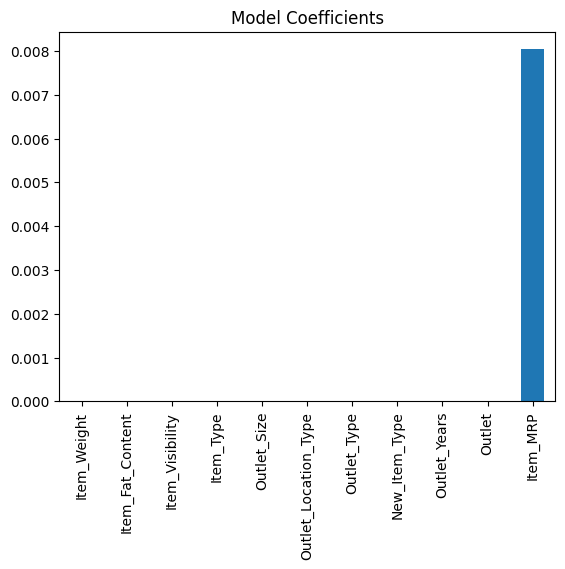

In [154]:
print("R2 score of train data: ",r2_score(y_train,las_train_pred))
print("R2 score of test data: ",r2_score(y_test,las_test_pred))
cv_score = cross_val_score(model3, x, y, scoring='neg_mean_squared_error', cv=5)
cv_score=np.abs(np.mean(cv_score))    
print ('Average R2 Score ',cv_score)   
coef = pd.Series(model3.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show() 

Decision Tree Regressor

In [156]:
print("R2 score of train data: ",r2_score(y_train,dt_train_pred))
print("R2 score of test data: ",r2_score(y_test,dt_test_pred))
cv_score = cross_val_score(model4, x, y, scoring='neg_mean_squared_error', cv=5)
cv_score=np.abs(np.mean(cv_score))    
print ('Average R2 Score ',cv_score)   

R2 score of train data:  1.0
R2 score of test data:  0.458647379143697
Average R2 Score  0.5811566593617018


Extra Trees Regressors

In [158]:
print("R2 score of train data: ",r2_score(y_train,et_train_pred))
print("R2 score of test data: ",r2_score(y_test,et_test_pred))
cv_score = cross_val_score(model5, x, y, scoring='neg_mean_squared_error', cv=5)
cv_score=np.abs(np.mean(cv_score))    
print ('Average R2 Score ',cv_score)   

R2 score of train data:  1.0
R2 score of test data:  0.682486866894598
Average R2 Score  0.32585840743650296


Randomized Search CV

In [162]:
print("R2 score of train data: ",r2_score(y_train,rscv_train_pred))
print("R2 score of test data: ",r2_score(y_test,rscv_test_pred))
cv_score = cross_val_score(model6, x, y, scoring='neg_mean_squared_error', cv=5)
cv_score=np.abs(np.mean(cv_score))    
print ('Average R2 Score ',cv_score) 


R2 score of train data:  0.8142559634343121
R2 score of test data:  0.7218103803331704
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\L

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\L

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\L

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\L

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\L

Average R2 Score  0.28004644519569805


AttributeError: 'RandomizedSearchCV' object has no attribute 'coef_'

LGBM Regressor